<a href="https://colab.research.google.com/github/EmamulHossen/Drinkers_or_Not/blob/main/Drinkers_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Imorting Modules**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

**Read the dataset**

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Data/smoking_driking_dataset_Ver01.csv/smoking_driking_dataset_Ver01.csv")

In [5]:
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [6]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [7]:
#Shape of Dataset
print("Shape of the dataset: {}".format(df.shape))
print("Shape of dataset: Number of Row:{},Number of Column:{}".format(df.shape[0],df.shape[1]))

Shape of the dataset: (991346, 24)
Shape of dataset: Number of Row:991346,Number of Column:24


In [8]:
'''
Y => 1
N => 0
'''
df.DRK_YN = df['DRK_YN'].replace(['Y', 'N'], [1,0])

In [9]:
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,1
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,0
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,1
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,1


**Check the Null/Missing value**

In [10]:
df.isnull().any()

sex                 False
age                 False
height              False
weight              False
waistline           False
sight_left          False
sight_right         False
hear_left           False
hear_right          False
SBP                 False
DBP                 False
BLDS                False
tot_chole           False
HDL_chole           False
LDL_chole           False
triglyceride        False
hemoglobin          False
urine_protein       False
serum_creatinine    False
SGOT_AST            False
SGOT_ALT            False
gamma_GTP           False
SMK_stat_type_cd    False
DRK_YN              False
dtype: bool

In [11]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

**There is no missing value in this dataset.**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [13]:
#Statistical Description
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,0.499813
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,0.500000
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000


**Separate the dataset as Label & Feature**

In [14]:
x=df.drop("DRK_YN",axis=1)
y=df["DRK_YN"]

In [15]:
x.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0


In [16]:
x.shape

(991346, 23)

In [17]:
y.shape

(991346,)

In [18]:
y.head(10)

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    1
8    1
9    1
Name: DRK_YN, dtype: int64

**Label Encoder**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
L_encoder=LabelEncoder()

In [21]:
L_encoder.fit_transform(x["sex"])

array([1, 1, 1, ..., 0, 1, 1])

In [22]:
x["sex"]=L_encoder.fit_transform(x["sex"])

In [23]:
x["sex"]

0         1
1         1
2         1
3         1
4         1
         ..
991341    1
991342    1
991343    0
991344    1
991345    1
Name: sex, Length: 991346, dtype: int64

In [24]:
x.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0
5,1,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,77.0,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0
6,0,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,66.0,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0
7,1,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0
8,1,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,56.0,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0
9,1,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,60.0,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0


In [25]:
x.tail(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
991336,1,80,170,60,74.0,1.0,0.9,1.0,1.0,139.0,...,75.0,84.0,57.0,12.0,1.0,1.2,18.0,11.0,15.0,2.0
991337,0,35,165,70,81.0,1.0,1.0,1.0,1.0,113.0,...,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0
991338,1,20,175,65,74.5,1.0,1.5,1.0,1.0,105.0,...,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0
991339,1,70,165,60,78.0,0.9,0.8,1.0,1.0,137.0,...,57.0,89.0,105.0,16.1,1.0,1.0,23.0,13.0,32.0,1.0
991340,0,50,150,50,72.6,1.0,1.0,1.0,1.0,116.0,...,48.0,105.0,125.0,15.2,1.0,0.8,28.0,26.0,29.0,1.0
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0
991345,1,50,160,70,90.5,1.0,1.5,1.0,1.0,133.0,...,39.0,153.0,163.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
for column in x.columns:
  if x[column].dtype==object:
    continue
  else:
    scaler.fit(x[[column]])
    x[column]=scaler.transform(x[[column]])
print(x.head())

   sex       age    height    weight  waistline  sight_left  sight_right  \
0  1.0  0.230769  0.666667  0.434783   0.082745    0.091837     0.091837   
1  1.0  0.153846  0.833333  0.478261   0.081736    0.081633     0.112245   
2  1.0  0.307692  0.583333  0.434783   0.083754    0.112245     0.142857   
3  1.0  0.461538  0.750000  0.478261   0.083754    0.142857     0.112245   
4  1.0  0.461538  0.583333  0.304348   0.072654    0.091837     0.112245   

   hear_left  hear_right       SBP  ...  HDL_chole  LDL_chole  triglyceride  \
0        0.0         0.0  0.257282  ...   0.005796   0.024424      0.009590   
1        0.0         0.0  0.305825  ...   0.006659   0.028722      0.012646   
2        0.0         0.0  0.257282  ...   0.004933   0.014263      0.010855   
3        0.0         0.0  0.378641  ...   0.009249   0.020125      0.011065   
4        0.0         0.0  0.344660  ...   0.007399   0.022665      0.010855   

   hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  

In [29]:
x.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,1.0,0.230769,0.666667,0.434783,0.082745,0.091837,0.091837,0.0,0.0,0.257282,...,0.005796,0.024424,0.009590,0.670833,0.0,0.009193,0.002000,0.004716,0.039078,0.0
1,1.0,0.153846,0.833333,0.478261,0.081736,0.081633,0.112245,0.0,0.0,0.305825,...,0.006659,0.028722,0.012646,0.616667,0.0,0.008172,0.001900,0.004855,0.026052,1.0
2,1.0,0.307692,0.583333,0.434783,0.083754,0.112245,0.142857,0.0,0.0,0.257282,...,0.004933,0.014263,0.010855,0.616667,0.0,0.008172,0.004601,0.004300,0.067134,0.0
3,1.0,0.461538,0.750000,0.478261,0.083754,0.142857,0.112245,0.0,0.0,0.378641,...,0.009249,0.020125,0.011065,0.691667,0.0,0.010215,0.002801,0.004578,0.017034,0.0
4,1.0,0.461538,0.583333,0.304348,0.072654,0.091837,0.112245,0.0,0.0,0.344660,...,0.007399,0.022665,0.010855,0.533333,0.0,0.007150,0.001800,0.001526,0.024048,0.0
5,1.0,0.461538,0.583333,0.260870,0.067608,0.112245,0.142857,0.0,0.0,0.364078,...,0.009372,0.018367,0.024344,0.533333,0.4,0.007150,0.002801,0.005410,0.036072,1.0
6,0.0,0.384615,0.333333,0.260870,0.061554,0.040816,0.030612,0.0,0.0,0.165049,...,0.008016,0.022274,0.007799,0.470833,0.0,0.007150,0.001800,0.001526,0.011022,0.0
7,1.0,0.230769,0.750000,0.347826,0.076892,0.112245,0.091837,0.0,0.0,0.315534,...,0.007029,0.020711,0.010539,0.558333,0.0,0.007150,0.001700,0.002358,0.034068,1.0
8,1.0,0.538462,0.666667,0.434783,0.076690,0.112245,0.081633,0.0,0.0,0.378641,...,0.006783,0.027354,0.010433,0.587500,0.0,0.007150,0.003101,0.003052,0.025050,0.0
9,1.0,0.307692,0.750000,0.434783,0.074672,0.142857,0.142857,0.0,0.0,0.315534,...,0.007276,0.022860,0.008642,0.537500,0.0,0.008172,0.002000,0.005132,0.015030,0.5


In [30]:
x.tail(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
991336,1.0,0.923077,0.666667,0.304348,0.066599,0.091837,0.081633,0.0,0.0,0.349515,...,0.009126,0.016217,0.005902,0.458333,0.0,0.011236,0.001700,0.001387,0.014028,0.5
991337,0.0,0.230769,0.583333,0.391304,0.073663,0.091837,0.091837,0.0,0.0,0.223301,...,0.007646,0.017780,0.009169,0.512500,0.0,0.006129,0.001900,0.002219,0.011022,0.0
991338,1.0,0.000000,0.750000,0.347826,0.067104,0.091837,0.142857,0.0,0.0,0.184466,...,0.008756,0.023251,0.009590,0.600000,0.0,0.007150,0.002400,0.003468,0.049098,0.5
991339,1.0,0.769231,0.583333,0.304348,0.070636,0.081633,0.071429,0.0,0.0,0.339806,...,0.006906,0.017194,0.010960,0.629167,0.0,0.009193,0.002200,0.001665,0.031062,0.0
991340,0.0,0.461538,0.333333,0.217391,0.065187,0.091837,0.091837,0.0,0.0,0.237864,...,0.005796,0.020320,0.013068,0.591667,0.0,0.007150,0.002701,0.003468,0.028056,0.0
991341,1.0,0.384615,0.750000,0.478261,0.084864,0.142857,0.142857,0.0,0.0,0.228155,...,0.005549,0.024228,0.013805,0.583333,0.0,0.009193,0.002501,0.004855,0.026052,0.0
991342,1.0,0.230769,0.666667,0.434783,0.078708,0.091837,0.142857,0.0,0.0,0.252427,...,0.004809,0.016217,0.004637,0.616667,0.0,0.010215,0.001300,0.002219,0.014028,0.0
991343,0.0,0.307692,0.416667,0.217391,0.060545,0.091837,0.061224,0.0,0.0,0.208738,...,0.011715,0.014850,0.016440,0.554167,0.0,0.007150,0.002901,0.003607,0.016032,1.0
991344,1.0,0.076923,0.750000,0.304348,0.064581,0.142857,0.091837,0.0,0.0,0.252427,...,0.004563,0.014068,0.005480,0.562500,0.0,0.007150,0.002000,0.001803,0.016032,0.0
991345,1.0,0.461538,0.500000,0.391304,0.083249,0.091837,0.142857,0.0,0.0,0.320388,...,0.004686,0.029699,0.017072,0.616667,0.0,0.008172,0.002300,0.005826,0.035070,1.0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test :",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (693942, 23)
Shape of x_test : (297404, 23)
Shape of y_train (693942,)
Shape of y_test: (297404,)


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
#Creating Object
clf=DecisionTreeClassifier()

In [36]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_train_predict=clf.predict(x_train)

In [38]:
y_train_predict

array([0, 0, 0, ..., 1, 0, 1])

In [39]:
y_train

751370    0
823097    0
439934    0
242598    1
346295    0
         ..
259178    1
365838    0
131932    1
671155    0
121958    1
Name: DRK_YN, Length: 693942, dtype: int64

In [40]:
y_test_predict=clf.predict(x_test)

In [41]:
y_test_predict

array([1, 0, 1, ..., 0, 0, 1])

In [42]:
y_test

676014    0
958905    0
472540    0
244194    1
88447     0
         ..
514545    1
867505    1
555098    1
751529    1
160158    0
Name: DRK_YN, Length: 297404, dtype: int64

In [43]:
traing_accuracy=clf.score(x_train,y_train)

In [44]:
traing_accuracy

1.0

In [45]:
testing_accuracy=clf.score(x_test,y_test)

In [46]:
testing_accuracy

0.6456570859840486

In [47]:
prediction_1=clf.predict([[1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0]])

In [48]:
prediction_1

array([0])

In [51]:
from sklearn.metrics import classification_report,precision_score,f1_score,recall_score,confusion_matrix,accuracy_score

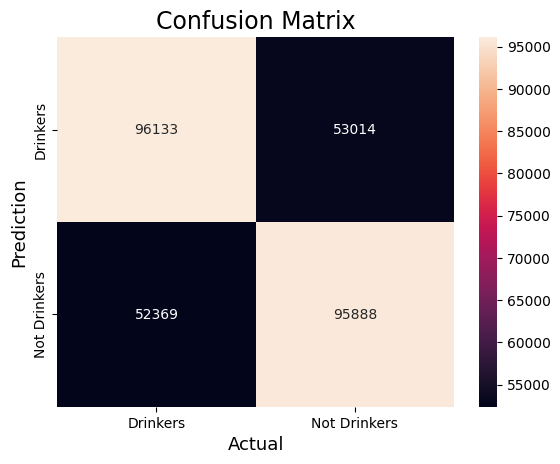

In [52]:

#compute the confusion matrix.
cm = confusion_matrix(y_test,y_test_predict)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Drinkers','Not Drinkers'],
			yticklabels=['Drinkers','Not Drinkers'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# **Accuracy_Score:**
**Accuracy=(True Positive + True Negative) / Total Predictions**

In [53]:
acc_score=accuracy_score(y_test,y_test_predict)

In [54]:
print(acc_score)

0.6456570859840486


In [55]:
cl_report=classification_report(y_test,y_test_predict)

In [56]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.65      0.64      0.65    149147
           1       0.64      0.65      0.65    148257

    accuracy                           0.65    297404
   macro avg       0.65      0.65      0.65    297404
weighted avg       0.65      0.65      0.65    297404



# **Precision:**
**Precision=True Positive / (True Positive + False Positive)<br/>
Precision does not evaluate the correctly predicted negative cases**

In [57]:
#Precision_Score
preci_score=precision_score(y_test,y_test_predict,average=None)

In [58]:
print(preci_score)

[0.64735155 0.64396717]


In [59]:
preci_score=precision_score(y_test,y_test_predict)

In [60]:
preci_score

0.6439671730399861

In [61]:
preci_score=precision_score(y_test,y_test_predict,average="macro")

In [62]:
preci_score

0.6456593619304252

In [63]:
preci_score=precision_score(y_test,y_test_predict,average="weighted")

In [64]:
preci_score

0.6456644259111131

# **Recall_Score:**
****The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.<br/>
The best value is 1 and the worst value is 0****

In [65]:
rec_score=recall_score(y_test,y_test_predict)

In [66]:
print(rec_score)

0.6467687866340206


# **F1_Score**

**F1 = 2 * (precision * recall) / (precision + recall)**

In [67]:
f1_s=f1_score(y_test,y_test_predict)

In [68]:
print(f1_s)

0.6453649393085856


# **Classification_Report**
**A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.**

In [69]:
cl_report=classification_report(y_test,y_test_predict)

In [70]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.65      0.64      0.65    149147
           1       0.64      0.65      0.65    148257

    accuracy                           0.65    297404
   macro avg       0.65      0.65      0.65    297404
weighted avg       0.65      0.65      0.65    297404

